## SentencePiece 모델 학습

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_table('C:/users/juwon/practice_aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('C:/users/juwon/practice_aiffel/sentiment_classification/data/ratings_test.txt')

In [3]:
print(len(train_data))
print(len(test_data))

150000
50000


In [4]:
train_data.head(30)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [5]:
test_data.sample(10)

,id,document,label
6900,3421663,허탈하고 참으로 어이가 없는 영화.좋아하시는 분들도 있겠죠.영화 만들기 참 쉽죠잉,0
43600,6111091,역시 일본!!!,0
5610,5280,흑인 특유의 신나는 음악이 너치는 영화..이제시대의 우리와 닮은..,1
13398,7346512,좋은영화네요,0
37467,4666845,살아진다는 것은 사라진다는 것. 그리하여 우리는 살아가야 하는...,1
10312,1694758,율브린너의 '왕과나'를 보고 이 작품과 비교해 보시길...,0
41463,10233953,...ㅋㅋㅋㅋ또르르르 돈아까워여,0
11926,9310408,군의 허상과 보수적 시선만 감싸서야.,0
24069,3238300,지루하진 않은데 내용이 너무 진부하다....재미도 없고...,0
43228,8081976,뭔영화가 시작하자 마자끝이나냐,0


In [6]:
train_data[train_data['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [7]:
train_data.dropna(inplace=True, how='any')
test_data.dropna(inplace= True, how='any')

In [8]:
train_data.drop_duplicates(subset='document', inplace=True, ignore_index =True)
test_data.drop_duplicates(subset='document',inplace= True, ignore_index=True)

In [9]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
146177,6222902,인간이 문제지.. 소는 뭔죄인가..,0
146178,8549745,평점이 너무 낮아서...,1
146179,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
146180,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [10]:
train_sentence = train_data['document']
test_sentence = test_data['document']

In [11]:
print(len(train_sentence))
print(len(test_sentence))

146182
49157


In [12]:
import re

def preprocessing_sentence(sentence):
    sentence = re.sub(r'([ㄱ-ㅎㅏ-ㅣ.,?!~]){2,}',r'\1\1', sentence)
    sentence = re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9.,?!~\'\"]',' ',sentence)
    sentence = re.sub(r'\'+', '\'', sentence)
    sentence = re.sub(r'\"+', '\"', sentence )
    sentence = sentence.lower().strip()
    
    sentence = re.sub(r'[" "]+', r' ',sentence)
    
    return sentence

In [13]:
sentence = preprocessing_sentence('이OO이 지나도 명작은 명작이다')
print(sentence)

이oo이 지나도 명작은 명작이다


In [14]:
X_train = []
X_test = []
for s in train_sentence:
    X_train.append(preprocessing_sentence(s))
    
for s in test_sentence:
    X_test.append(preprocessing_sentence(s))

In [15]:
X_train

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠..포스터보고 초딩영화줄..오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화..별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남..바베트의 만찬은 이야기도 있고 음식 보는재미도 있

In [16]:
X_test

['굳 ㅋ',
 'gdntopclassintheclub',
 '뭐야 이 평점들은.. 나쁘진 않지만 10점 짜리는 더더욱 아니잖아',
 '지루하지는 않은데 완전 막장임.. 돈주고 보기에는..',
 '3d만 아니었어도 별 다섯 개 줬을텐데.. 왜 3d로 나와서 제 심기를 불편하게 하죠??',
 '음악이 주가 된, 최고의 음악영화',
 '진정한 쓰레기',
 '마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다',
 '갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다',
 '이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 but, 모든 사람이 그렇지는 않네..',
 '괜찮네요오랜만포켓몬스터잼밌어요',
 '한국독립영화의 한계 그렇게 아버지가 된다와 비교됨',
 '청춘은 아름답다 그 아름다움은 이성을 흔들어 놓는다. 찰나의 아름다움을 잘 포착한 섬세하고 아름다운 수채화같은 퀴어영화이다.',
 '눈에 보이는 반전이었지만 영화의 흡인력은 사라지지 않았다.',
 ' 스토리, 연출, 연기, 비주얼 등 영화의 기본 조차 안된 영화에 무슨 평을 해. 이런 영화 찍고도 김문옥 감독은 내가 영화 경력이 몇oo인데 조무래기들이 내 영화를 평론해? 같은 마인드에 빠져있겠지? ',
 '소위 ㅈ문가라는 평점은 뭐냐?',
 '최고!!',
 '발연기 도저히 못보겠다 진짜 이렇게 연기를 못할거라곤 상상도 못했네',
 '나이스',
 '별 재미도없는거 우려먹어 .. 챔프에서 방송 몇번했더라 ? ㅋㅋ',
 "'13일의 금요일', '나이트메어'시리즈와 함께 가장 많은 시리즈를 양산해냈던 헬레이저 시리즈의 첫편. 작가의 상상력이 돋보이는 작품이며, 갈고리로 사지찢는 고어씬은 지금보더라도 상당히 잔인하고 충격적이다.",
 '나름 교훈돋기는 하지만 어쩔수없이 저평점 받을수밖에 없는 저질섹스코미디',
 '꽤 재밌게 본 영화였다!',
 '민주화 시대의 억눌린 영혼의 관음적인 욕구 분출.인상적이다.',
 '일

총 데이터의 크기: 195339


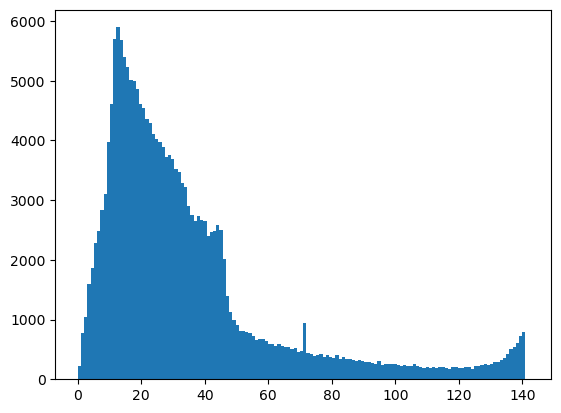

In [17]:
total_list = X_train + X_test
len_sen = [len(sen) for sen in total_list]
print('총 데이터의 크기:', len(total_list))
plt.hist(len_sen,bins=140)
plt.show()

In [18]:
max_len = 80
len_sen = np.array(len_sen)
print(np.sum(len_sen<max_len)/ len(len_sen))

0.9090913744823103


In [19]:
total_list = [sen for sen in total_list if len(sen)<80]
len(total_list)

177581

In [20]:
train=[]
train_labels = []
for i,sen in enumerate(X_train):
    if len(sen) < 80 : 
        train.append(sen)
        train_labels.append(train_data['label'].loc[i])

In [21]:
len(train)

132894

In [22]:
test=[]
test_labels = []
for i, sen in enumerate(X_test):
    if len(sen) < 80 :
        test.append(sen)
        test_labels.append(test_data['label'].loc[i])

In [23]:
len(test)

44687

In [53]:
import sentencepiece as spm

temp_file = 'C:/users/juwon/practice_aiffel/gd_nlp/sp_tokenizer/data/naver_movie.train.ko.temp'
vocab_size = 12000
with open(temp_file,'w', encoding='UTF-8') as f:
    for row in total_list:
        f.write(row+ '\n')
spm.SentencePieceTrainer.Train('--input={} --model_prefix=korean_spm_naver --vocab_size={}'.format(temp_file, vocab_size))

In [54]:
s = spm.SentencePieceProcessor()
s.load('korean_spm_naver.model')
vocab_path = 'C:/users/juwon/practice_aiffel/gd_nlp/korean_spm_naver.vocab'

def sp_tokenize(s,corpus):
    tensor = []
    
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))
    
    with open(vocab_path, 'r', encoding='UTF-8') as f :
        vocab =  f.readlines()
        
    word_index = {}
    index_word = {}
    
    for idx, line in enumerate(vocab):
        word = line.split('\t')[0]
        
        word_index.update({word:idx})
        index_word.update({idx:word})
        
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding ='pre')
    
    return tensor, word_index, index_word

In [55]:
tensor, word_index, index_word = sp_tokenize(s, total_list)

In [56]:
from sklearn.model_selection import train_test_split
labels = np.array(train_labels + test_labels)
x_train, x_test, y_train, y_test = train_test_split(tensor,labels, test_size = 0.4,random_state=42)

In [57]:
word_vector_dim = 128
vocab_size = 12000

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(tf.keras.layers.LSTM(16, return_sequences=True))
model.add(tf.keras.layers.LSTM(16, return_sequences=True))

model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(16, activation ='relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         1536000   
                                                                 
 lstm_15 (LSTM)              (None, None, 16)          9280      
                                                                 
 lstm_16 (LSTM)              (None, None, 16)          2112      
                                                                 
 lstm_17 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [58]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

epochs = 5
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = 512,
                   validation_data=(x_test, y_test),
                    verbose =1
                   )

Epoch 1/5
209/209 [==============================] - 20s 59ms/step - loss: 0.5251 - accuracy: 0.7380 - val_loss: 0.3829 - val_accuracy: 0.8299
Epoch 2/5
209/209 [==============================] - 10s 48ms/step - loss: 0.3415 - accuracy: 0.8578 - val_loss: 0.3416 - val_accuracy: 0.8473
Epoch 3/5
209/209 [==============================] - 11s 51ms/step - loss: 0.2919 - accuracy: 0.8793 - val_loss: 0.3385 - val_accuracy: 0.8516
Epoch 4/5
209/209 [==============================] - 10s 50ms/step - loss: 0.2525 - accuracy: 0.8953 - val_loss: 0.3691 - val_accuracy: 0.8498
Epoch 5/5
209/209 [==============================] - 11s 54ms/step - loss: 0.2162 - accuracy: 0.9114 - val_loss: 0.3916 - val_accuracy: 0.8466


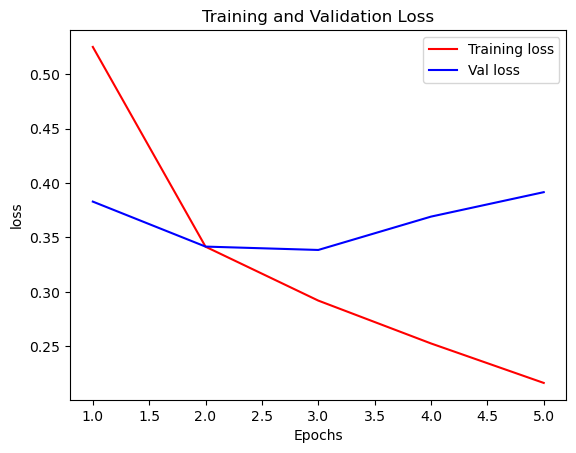

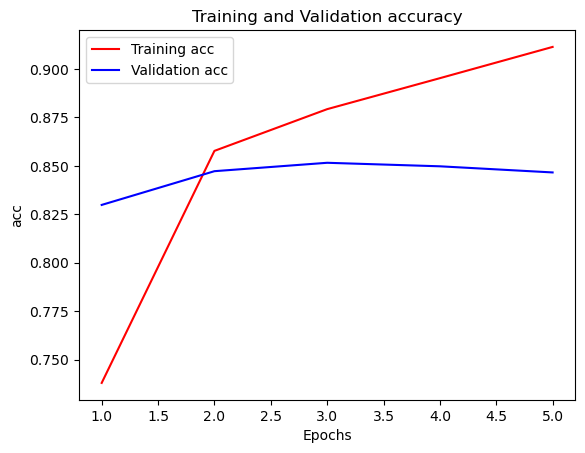

In [59]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, c='r', label='Training loss')
plt.plot(epochs,val_loss, c='b', label = 'Val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(epochs, acc ,'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## --model_type = bpe

In [69]:
temp_file = 'C:/users/juwon/practice_aiffel/gd_nlp/sp_tokenizer/data/naver_movie.train.ko.temp'
vocab_size = 12000
with open(temp_file,'w', encoding='UTF-8') as f:
    for row in total_list:
        f.write(row+ '\n')
spm.SentencePieceTrainer.Train('--input={} --model_prefix=korean_spm_bpe_naver --vocab_size={} --model_type=bpe'.format(temp_file, vocab_size))

In [70]:
s.load('korean_spm_bpe_naver.model')
vocab_path = 'C:/users/juwon/practice_aiffel/gd_nlp/korean_spm_bpe_naver.vocab'

tensor, word_index, index_word = sp_tokenize(s, total_list)

In [71]:
labels = np.array(train_labels + test_labels)
x_train, x_test, y_train, y_test = train_test_split(tensor,labels, test_size = 0.4,random_state=42)

In [72]:
word_vector_dim = 256
vocab_size = 12000

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(tf.keras.layers.LSTM(16, return_sequences=True))
model.add(tf.keras.layers.LSTM(16, return_sequences=True))

model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(16, activation ='relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 256)         3072000   
                                                                 
 lstm_21 (LSTM)              (None, None, 16)          17472     
                                                                 
 lstm_22 (LSTM)              (None, None, 16)          2112      
                                                                 
 lstm_23 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                

In [73]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

epochs = 5
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = 512,
                   validation_data=(x_test, y_test),
                    verbose =1
                   )

Epoch 1/5
209/209 [==============================] - 24s 68ms/step - loss: 0.5084 - accuracy: 0.7487 - val_loss: 0.3701 - val_accuracy: 0.8356
Epoch 2/5
209/209 [==============================] - 12s 56ms/step - loss: 0.3331 - accuracy: 0.8630 - val_loss: 0.3414 - val_accuracy: 0.8498
Epoch 3/5
209/209 [==============================] - 11s 54ms/step - loss: 0.2788 - accuracy: 0.8879 - val_loss: 0.3472 - val_accuracy: 0.8480
Epoch 4/5
209/209 [==============================] - 12s 59ms/step - loss: 0.2382 - accuracy: 0.9050 - val_loss: 0.3784 - val_accuracy: 0.8462
Epoch 5/5
209/209 [==============================] - 13s 65ms/step - loss: 0.1983 - accuracy: 0.9219 - val_loss: 0.4364 - val_accuracy: 0.8401


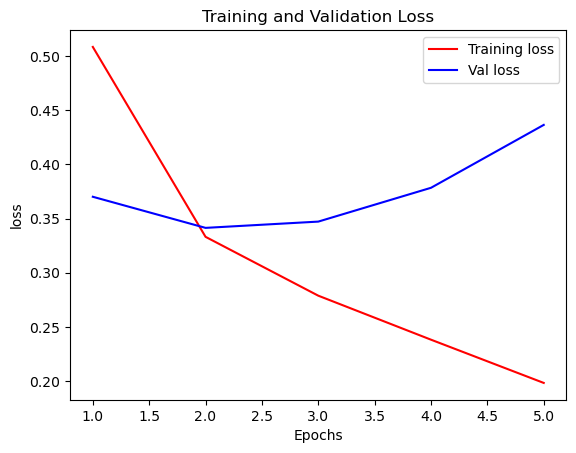

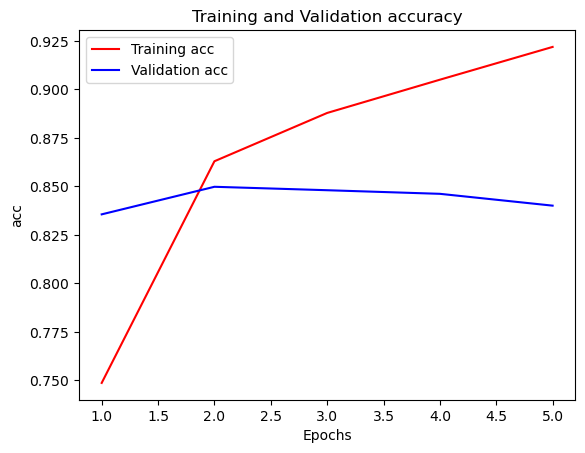

In [74]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, c='r', label='Training loss')
plt.plot(epochs,val_loss, c='b', label = 'Val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(epochs, acc ,'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## mecab

In [78]:
from eunjeon import Mecab
def mecab_split(sentence):
    mecab = Mecab()
    mecab_tensor = mecab.morphs(sentence)
    return mecab_tensor

mecab_corpus = []
for sentence in total_list:
    mecab_corpus.append(mecab_split(sentence))

In [83]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)
    tensor = tokenizer.texts_to_sequences(corpus)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding = 'post')
    
    return tensor, tokenizer
mecab_tensor , mecab_tokenizer = tokenize(mecab_corpus)
print(len(mecab_tokenizer.index_word))

49124


In [84]:
x_train, x_test, y_train, y_test = train_test_split(mecab_tensor,labels, test_size = 0.4,random_state=42)

In [106]:
word_vector_dim = 128
vocab_size = 8000

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(tf.keras.layers.LSTM(16, return_sequences=True))
model.add(tf.keras.layers.LSTM(16, return_sequences=True))

model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(16, activation ='relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, None, 128)         1024000   
                                                                 
 lstm_45 (LSTM)              (None, None, 16)          9280      
                                                                 
 lstm_46 (LSTM)              (None, None, 16)          2112      
                                                                 
 lstm_47 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                272       
                                                                 
 dense_31 (Dense)            (None, 1)               

In [107]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

epochs = 7
history = model.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = 512,
                   validation_data=(x_test, y_test),
                    verbose =1
                   )

Epoch 1/7
209/209 [==============================] - 17s 45ms/step - loss: 0.5910 - accuracy: 0.6648 - val_loss: 0.4061 - val_accuracy: 0.8211
Epoch 2/7
209/209 [==============================] - 8s 37ms/step - loss: 0.3743 - accuracy: 0.8424 - val_loss: 0.3544 - val_accuracy: 0.8464
Epoch 3/7
209/209 [==============================] - 8s 37ms/step - loss: 0.3329 - accuracy: 0.8615 - val_loss: 0.3488 - val_accuracy: 0.8463
Epoch 4/7
209/209 [==============================] - 8s 38ms/step - loss: 0.3136 - accuracy: 0.8691 - val_loss: 0.3628 - val_accuracy: 0.8452
Epoch 5/7
209/209 [==============================] - 8s 37ms/step - loss: 0.2963 - accuracy: 0.8746 - val_loss: 0.3537 - val_accuracy: 0.8439
Epoch 6/7
209/209 [==============================] - 7s 35ms/step - loss: 0.2765 - accuracy: 0.8827 - val_loss: 0.3796 - val_accuracy: 0.8496
Epoch 7/7
209/209 [==============================] - 7s 36ms/step - loss: 0.2595 - accuracy: 0.8907 - val_loss: 0.3585 - val_accuracy: 0.8499


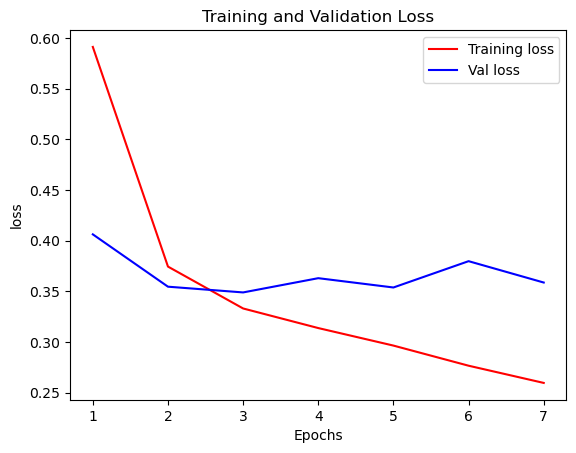

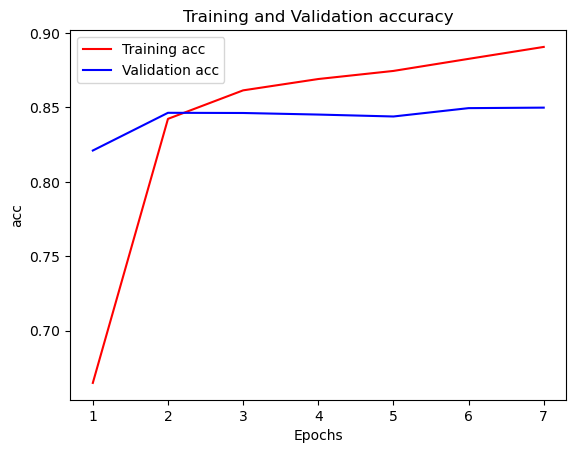

In [108]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, c='r', label='Training loss')
plt.plot(epochs,val_loss, c='b', label = 'Val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(epochs, acc ,'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 회고

3에폭이후 부터 val_loss가 증가하는 과적합이 발생했다.
SentencePiece의 vocab size를 8000, 10000, 12000, 180000, 20000으로 돌려보았을때 10000, 12000을 제외하곤 2에폭부터 과적합이 발생했다.
하지만 vocabsize와 과적합 이후 val_loss의 증가량은 반비례했다. 

model_type을 bpe로 바꾸고 돌려보았다. vocab_size는 10000, 12000을 사용했지만 2에폭이후 과적합 발생.

mecab은 konply의 다른 분석기들 보다 성능과 속도면에서 우수하여 선택했다.
meacb도 8000,10000,12000, 15000,20000으로 시도해보았다.
val_acc도 85%로 서로 비슷했다.